### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

purchase_data.tail(10)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
770,770,Lirtosia63,34,Male,12,Dawne,1.02
771,771,Iskossasda43,16,Male,25,Hero Cane,4.35
772,772,Asur53,26,Male,136,Ghastly Adamantite Protector,3.58
773,773,Hala31,21,Male,19,"Pursuit, Cudgel of Necromancy",1.02
774,774,Jiskjask80,11,Male,101,Final Critic,4.19
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19
779,779,Ennrian78,24,Male,50,Dawn,4.60


## Player Count

* Display the total number of players


In [3]:
# check if duplicates exist in sn column
purchase_data['SN'].duplicated().any()

# Total number of players - no duplicates
total_players = purchase_data['SN'].nunique()

#Create a new dataframe to keep the data and show the results
new_df_total_players = pd.DataFrame(data = [total_players])
#Add column name
new_df_total_players.columns = ['Total Players']
#format the dataframe results to only show the value and not the unnessary index
(new_df_total_players
 .style
 .hide_index()
.set_caption('Player Count'))

Total Players
576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [4]:
#Command to perform the calculations for unique items, mean, count and sum
my_dataframe = pd.DataFrame([[purchase_data['Item ID'].nunique(), purchase_data['Price'].mean(), purchase_data['Item Name'].count(), purchase_data['Price'].sum()]])
#change the column names
my_dataframe.columns = ['Number of Unique Items', 'Average Price', 'Number of Purchases', 'Total Revenue']
#format the values to currency
format_dict = {'Average Price': "${:.2f}", 'Total Revenue': '${:,.2f}'}
#Change the styling of the dataframe
(my_dataframe
 .style
 .format(format_dict)
 .hide_index()
 .set_caption('Purchasing Analysis (Total)'))

Number of Unique Items,Average Price,Number of Purchases,Total Revenue
183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [5]:
# Create dataframe to hold the data
df = pd.DataFrame(purchase_data)
# Remove duplicates in the dataset
df = df.drop_duplicates(subset='SN', keep='first')
# Provide the gender count and assign it to the Total Count column
gender_count = df.groupby(['Gender'])['Gender'].count().rename('Total Count')
# Calculate the percentage of each gender
gender_perc = (gender_count/total_players).rename('Percentage')
# Format the percentage data
gender_perc = gender_perc.astype(float).map("{:.2%}".format)

# Write the data to a new data frame
new_df_gender_dems = pd.DataFrame(data = [gender_count, gender_perc])
# Transpose the rows to columns
new_df_gender_dems = new_df_gender_dems.T
new_df_gender_dems


,Total Count,Percentage
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [17]:
# Group the data by gender, count the purchase id's and assign to the Purchase count column
purchase_count = purchase_data.groupby(['Gender'])['Purchase ID'].count().rename('Purchase Count')
# Group the data by gender, calculate the average price per gender and assign the value to the Avergage Purchase Price column
purchase_price = purchase_data.groupby(['Gender'])['Price'].mean().rename('Average Purchase Price')
# Group the data by gender and calculate the total purchace value and write it to the Total Purchace column
purchase_total = purchase_data.groupby(['Gender'])['Price'].sum().rename('Total Purchase Value')
# Calculate the average purchace value by buyer and write the value to the Average Purchase per person column
purchase_average_per_person = (purchase_total/gender_count).rename('Average Purchase per Person')
# Write the calculated data to a new data frame and transpose the rows to columns
new_df_gender = pd.DataFrame(data = [purchase_count, purchase_price, purchase_total, purchase_average_per_person])
new_df_gender = new_df_gender.T

# Provide a new formating for the columns
format_dict = {'Purchase Count': "{:.0f}",'Average Purchase Price': "${:.2f}", 'Total Purchase Value': '${:,.2f}', 'Average Purchase per Person': '${:,.2f}'}
# Assign the formatting and style to the dataframe and provide a caption
(new_df_gender
 .style
 .format(format_dict)
 .set_caption('Purchasing Analysis (Gender)'))


,Purchase Count,Average Purchase Price,Total Purchase Value,Average Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [7]:
# Create a list for the different age bands
bins = [0, 9, 14, 19, 24, 29, 34, 39, np.inf]
# Write the label values for each age band to a list
names = ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']
# Categorise the players into the age bands according to their age
df['Age Range'] = pd.cut(df['Age'], bins, labels=names)
# Assign the count of each age range to the Count of Age column
binned_age_count = df.groupby(['Age Range'])['Age'].count().rename('Count of Age')
# Calculate the percentage of each age range and assign it to the Percentage column
binned_age_percentage = (binned_age_count/df['SN'].count()).rename('Percentage')
# Format the Percentage column values to show %
binned_age_percentage = binned_age_percentage.astype(float).map("{:.2%}".format)
# Assign the values to a new data frame and transpose the rows into columns
new_df_age_dems = pd.DataFrame(data = [binned_age_count, binned_age_percentage])
new_df_age_dems = new_df_age_dems.T
new_df_age_dems

,Count of Age,Percentage
Age Range,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [8]:
# Create age range bands based on the players age
purchase_data['Age Range'] = pd.cut(purchase_data['Age'], bins, labels=names)
# Count the number of players per age band and assign to the Purchase Count column
binned_purchase_count_per_age = purchase_data.groupby(['Age Range'])['Purchase ID'].count().rename('Purchase Count')
# Calculate the average purchase value per age band and assign to the Average Purchase Price column
binned_average_purchase_price_per_age = purchase_data.groupby(['Age Range'])['Price'].mean().rename('Average Purchase Price')
# Calculate the total purchase value per player and assign to the Total Purchase Value column
purchase_total_per_age = purchase_data.groupby(['Age Range'])['Price'].sum().rename('Total Purchase Value')

# Calculate the average purchase per player and assign to the Average Total Purchase per person column
purchase_average_per_age = (purchase_total_per_age/binned_age_count).rename('Average Total Purchase per Person')
# Assign the values to a new data frame and transpose the rows to columns
new_df_age = pd.DataFrame(data = [binned_purchase_count_per_age, binned_average_purchase_price_per_age, purchase_total_per_age,purchase_average_per_age])
new_df_age = new_df_age.T


# Format the values in the columns to the appropriate style
format_dict = {'Purchase Count': "{:.0f}",'Average Purchase Price': "${:.2f}", 'Total Purchase Value': '${:,.2f}', 'Average Total Purchase per Person': '${:,.2f}'}

# Apply the formatting to the dataframe and add a caption
(new_df_age
 .style
 .format(format_dict)
 .set_caption('Purchasing Analysis (Age)'))


,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase per Person
Age Range,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [9]:
# Group the purchases for each player and count the number of purchases made for each
purchase_count_per_person = purchase_data.groupby(['SN'])['Purchase ID'].count().rename('Purchase Count')
# Calculate the average purchase price for each player
average_purchase_price_per_person = purchase_data.groupby(['SN'])['Price'].mean().rename('Average Purchase Price')
# Calculate the total purchase value for each player
total_purchase_price_per_person = purchase_data.groupby(['SN'])['Price'].sum().rename('Total Purchase Value')

# Assign the calculated values to a new data frame and transpose the rows into columns
new_df_top_spenders = pd.DataFrame(data = [purchase_count_per_person,average_purchase_price_per_person, total_purchase_price_per_person])
new_df_top_spenders = new_df_top_spenders.T
# sort the Total purchase price from higest to lowest
new_df_top_spenders.sort_values(['Total Purchase Value'], ascending=False, inplace=True)

#Format the dataframe and add a caption
format_dict = {'Purchase Count': "{:.0f}",'Average Purchase Price': "${:.2f}", 'Total Purchase Value': '${:,.2f}'}

(new_df_top_spenders
 .style
 .format(format_dict)
 .set_caption('Purchasing Analysis (Age)'))

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10
Ilarin91,3,$4.23,$12.70
Ialallo29,3,$3.95,$11.84
Tyidaim51,3,$3.94,$11.83
Lassilsala30,3,$3.84,$11.51


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [10]:
# create a new dataframe with only the Item Id, Item Name and Price columns
popular_items_df = purchase_data.loc[:,["Item ID", "Item Name", "Price"]]

# Group the data by Item Id and then Item Name and count the number of purchases
purchase_count_per_item = purchase_data.groupby(['Item ID','Item Name'])['Purchase ID'].count().rename('Purchase Count')
# Assign the item price according to the grouping
purchase_price = purchase_data.groupby(['Item ID','Item Name'])['Price'].max()
# Calculate the total purchase price per item
total_purchase_price_per_item = (purchase_count_per_item * purchase_price).rename('Total Purchase Value')
# Assign the calculated values to a new data frame and transpose the rows into columns
new_df_popular_items = pd.DataFrame(data = [purchase_count_per_item, purchase_price, total_purchase_price_per_item])
new_df_popular_items = new_df_popular_items.T
# Sort the data frame by Purchase count from highest to lowest
new_df_popular_items.sort_values(['Purchase Count'], ascending=False, inplace=True)
# Format and display the data frame
format_dict = {'Purchase Count': "{:.0f}",'Price': "${:.2f}", 'Total Purchase Value': '${:,.2f}'}

#Identify the top 10 items for graph later on
top_10_items = new_df_popular_items.nlargest(10,'Purchase Count')

# Format and display the dataframe
(new_df_popular_items
 .style
 .format(format_dict)
 .bar(color='lightgreen', vmin=0, subset=['Total Purchase Value'], align='zero')
 .set_caption('Most Popular Items'))

,,Purchase Count,Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16
103,Singed Scalpel,8,$4.35,$34.80
75,Brutality Ivory Warmace,8,$2.42,$19.36
72,Winter's Bite,8,$3.77,$30.16
60,Wolf,8,$3.54,$28.32


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [11]:
# Sort the popular items data frame by Total purchase price from high to low
new_df_popular_items.sort_values(['Total Purchase Value'], ascending=False, inplace=True)
# Assign formatting to the table and display
format_dict = {'Purchase Count': "{:.0f}",'Price': "${:.2f}", 'Total Purchase Value': '${:,.2f}'}

(new_df_popular_items
 .style
 .format(format_dict)
 .set_caption('Most Popular Items'))

,,Purchase Count,Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80
59,"Lightning, Etcher of the King",8,$4.23,$33.84
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
78,"Glimmer, Ender of the Moon",7,$4.40,$30.80
72,Winter's Bite,8,$3.77,$30.16


In [12]:
# Play with charts

<IPython.core.display.Javascript object>


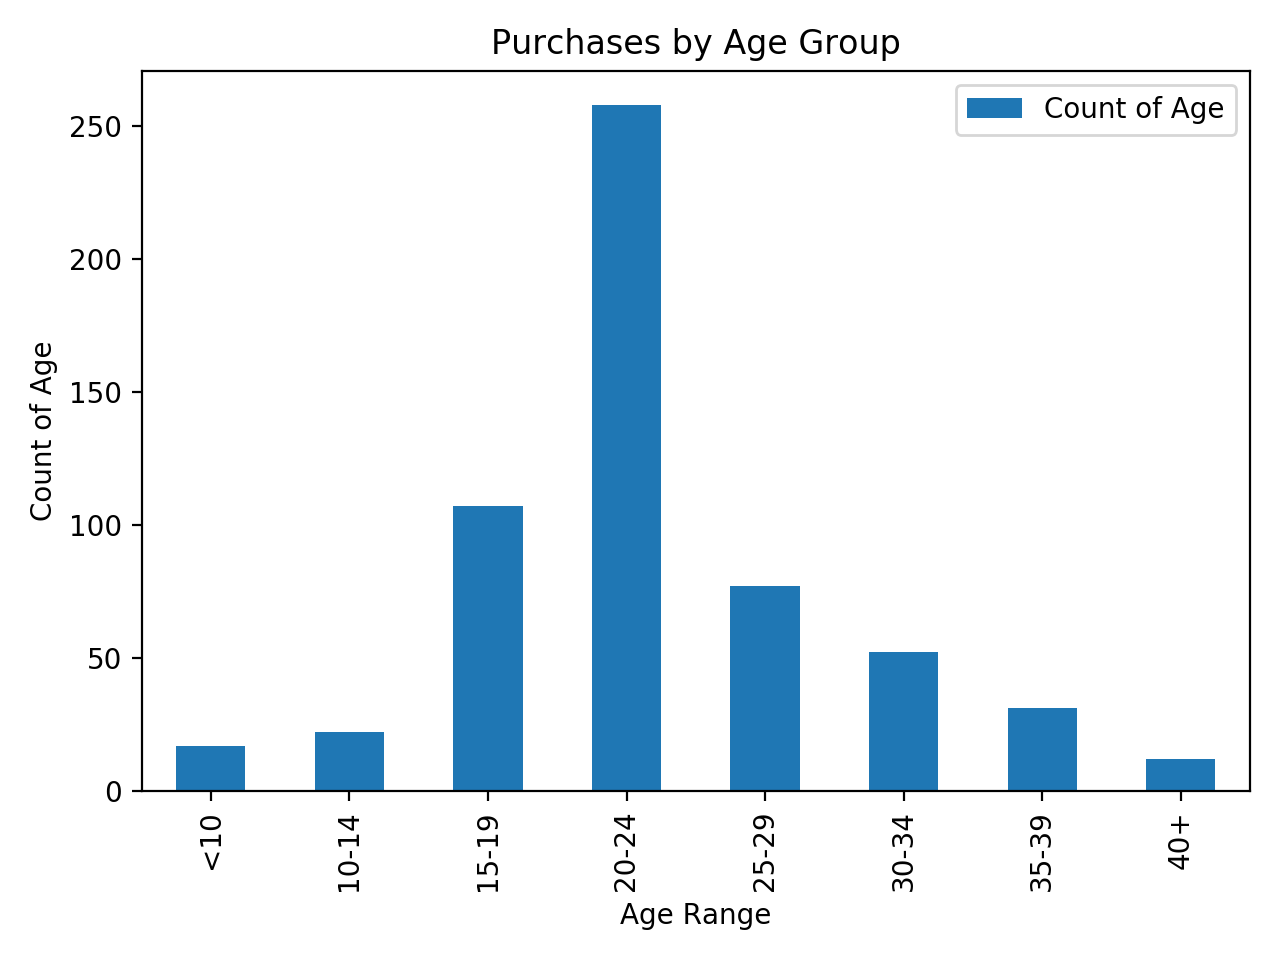

In [13]:
# Create a bar chart based off of the group series from before
perc_chart = new_df_age_dems.plot(kind='bar')

# Set the xlabel and ylabel using class methods
perc_chart.set_xlabel("Age Range")
perc_chart.set_ylabel("Count of Age")
plt.title("Purchases by Age Group")

plt.show()
plt.tight_layout()
plt.savefig("Purchase_by_Age")

<IPython.core.display.Javascript object>


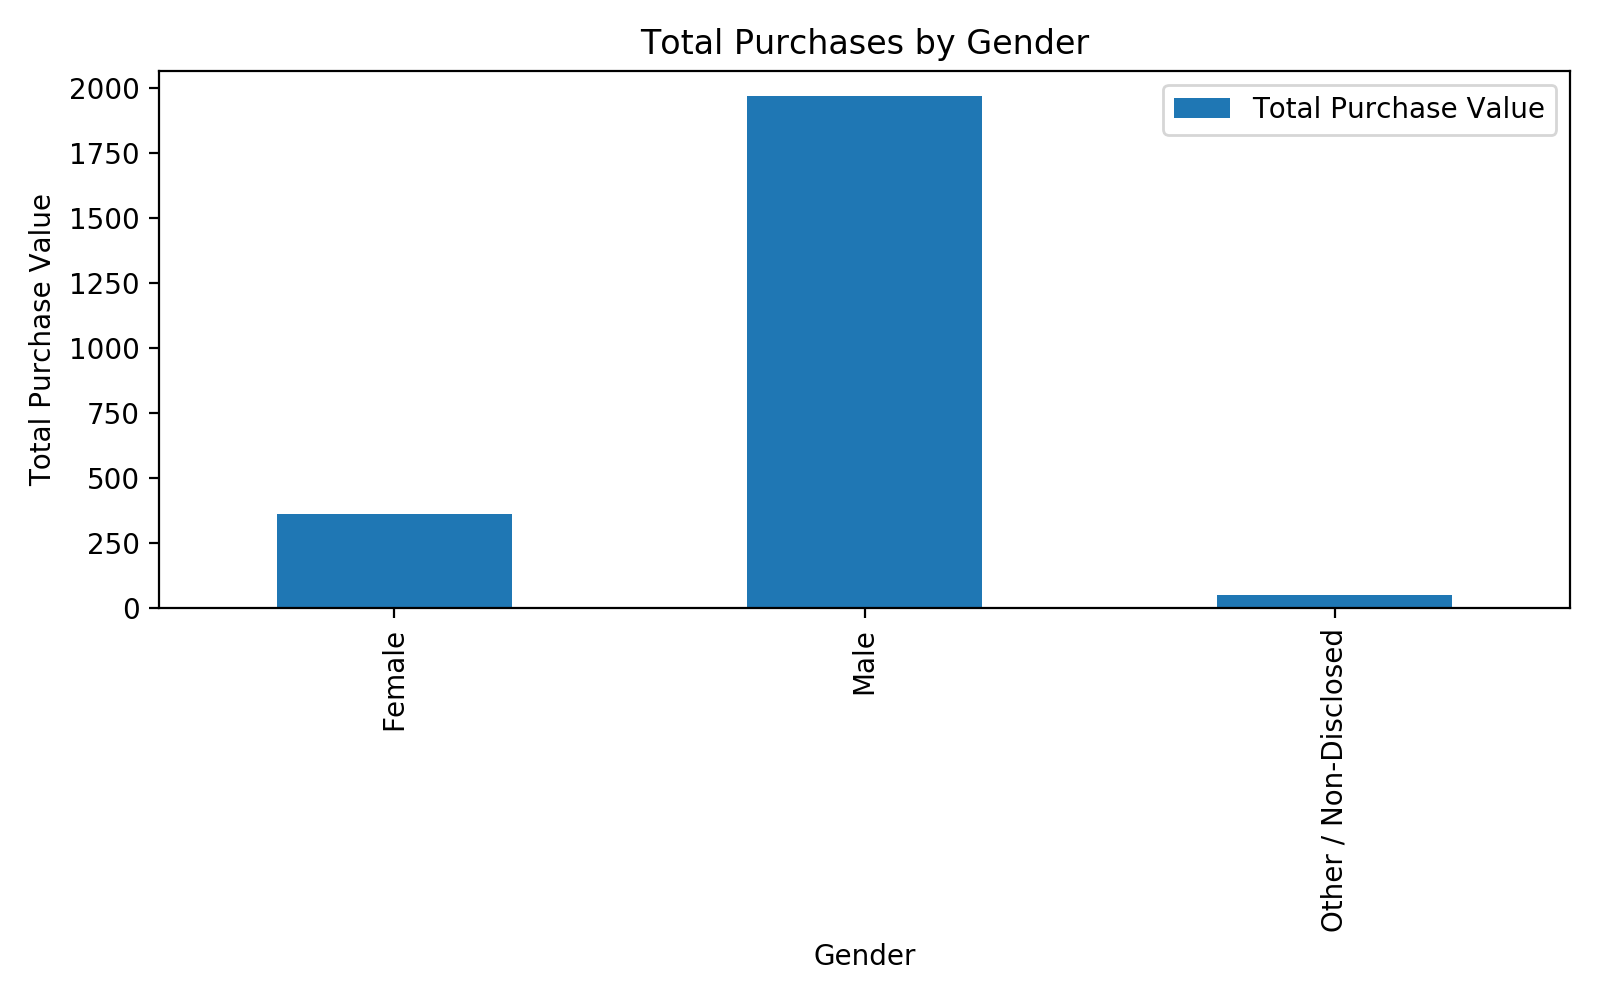

In [15]:
# Create a bar chart based off of the group series from before
gender_chart = new_df_gender.plot(kind='bar',y='Total Purchase Value')

# Set the xlabel and ylabel using class methods
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Total Purchase Value")
plt.title("Total Purchases by Gender")
plt.legend(["Total Purchase Value"])
plt.show()
plt.tight_layout()
plt.savefig("Purchase_by_Gender")

<IPython.core.display.Javascript object>


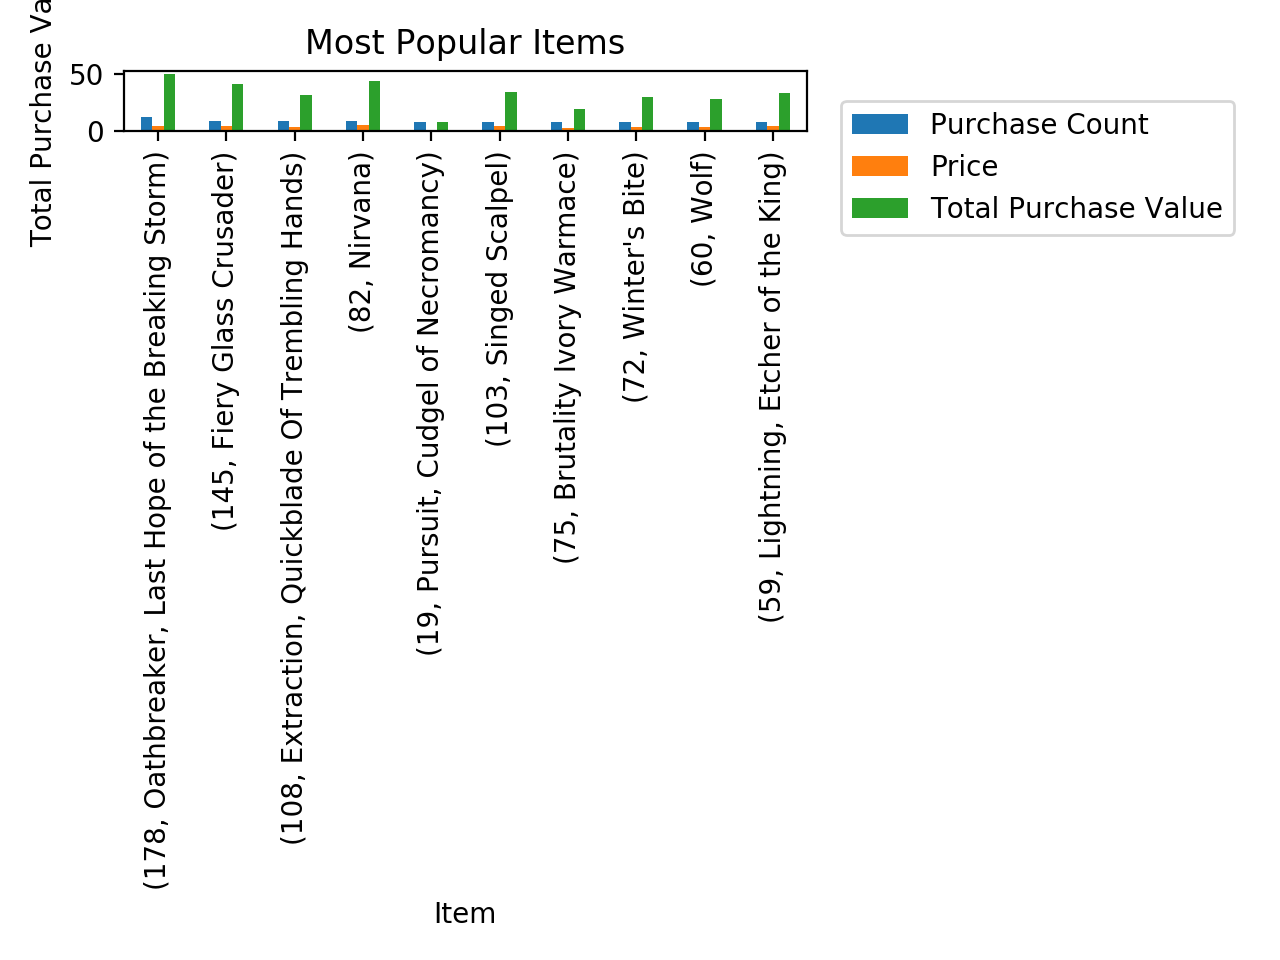

In [14]:
top_10_items
# Create a bar chart based off of the group series from before
popular_Items_chart = top_10_items.plot(kind='bar')

# Set the xlabel and ylabel using class methods
popular_Items_chart.set_xlabel("Item")
popular_Items_chart.set_ylabel("Total Purchase Value")
plt.title("Most Popular Items")
plt.rc('figure', figsize=[8,5])
plt.legend(["Purchase Count", "Total Purchase Price"])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0.)
plt.show()
plt.tight_layout()
plt.savefig("Popular_Items")